In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances, pairwise_distances_argmin
from tqdm import tqdm

In [2]:
class AgglomerativeClustering:
    def __init__(self, n_clusters=None, threshold=3, linkage='average'):
        self.n_clusters = n_clusters
        self.threshold = threshold
        self.linkage = linkage

    def calculate_linkage(self, distance_matrix, linkage_calculated):
        link_matrix: np.ndarray = distance_matrix.copy()
        if np.unique(self.expectation).shape[0] != self.expectation.shape[0]:
            i0 = np.where(linkage_calculated == 0)[0]
            i1 = np.where(linkage_calculated == 1)[0]
            i2 = np.where(linkage_calculated == 2)[0]
            for i in i0:
                link_matrix[i,:] = self.distances_sum
                link_matrix[:,i] = self.distances_sum
            for i in i1:
                for j in i2:
                    i_cluster = np.where(self.expectation == i)[0]
                    j_cluster = np.where(self.expectation == j)[0]
                    ij_dist = distance_matrix[i_cluster][:,j_cluster]
                    ij_dist_m = ij_dist[ij_dist<self.distances_sum]
                    link_matrix[i][j] = ij_dist_m.mean()
        return link_matrix
    
    def fit(self, X):
        self._X = X
        self.expectation:np.ndarray = np.arange(self._X.shape[0])
        self.expectation_counts = np.ones(self._X.shape[0])
        self.linkage_calculated = np.ones(self._X.shape[0])

        self.distance_matrix = pairwise_distances(self._X, self._X)
        self.distances_sum = self.distance_matrix.sum()
        np.fill_diagonal(self.distance_matrix, self.distances_sum)
        
        for i in tqdm(range(X.shape[0] - self.n_clusters)):
        # while np.unique(self.expectation).shape[0] > self.n_clusters:
            linkages = self.calculate_linkage(self.distance_matrix, self.linkage_calculated)
            self.linkage_calculated[self.linkage_calculated == 1] = 2

            ind = np.argmin(linkages)
            i = ind // linkages.shape[0]
            j = ind % linkages.shape[1]
            if self.distance_matrix[i][j] < self.threshold:
                self.expectation[self.expectation == i] = j
                self.expectation_counts[j] += self.expectation_counts[i]
                self.expectation_counts[i] = 0
                self.linkage_calculated[i] = 0
                self.linkage_calculated[j] = 1
            else:
                print('Tolerance limit reached')
                break
        
    def predict(self, X):
        # calculate linkages between all points in X and all clusters
        # assign each point from X to its closest cluster
        exp = []
        for x in X: 
            dist = pairwise_distances([x], self._X)
            np.fill_diagonal(dist, dist.sum())
            linkage_calculated = np.ones(X.shape[0])
            linkages = self.calculate_linkage(dist, linkage_calculated)
            ind = np.argmin(linkages)
            i = ind // linkages.shape[1]
            j = ind % linkages.shape[1]
            if dist[i][j] < self.threshold:
                exp.append(self.expectation[j])
            else:
                exp.append(-1)
        return np.array(exp)

In [3]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.3, random_state=0)

X1, y1_true = make_blobs(n_samples=1000, centers=6, cluster_std=1, random_state=0)

In [4]:
agg_clust = AgglomerativeClustering(n_clusters=4, threshold=3)

100%|██████████| 296/296 [00:01<00:00, 156.65it/s]


(array([249, 277, 287, 296]), array([75, 75, 75, 75], dtype=int64))
(array([ -1, 249, 277, 287, 296]), array([270, 173, 160, 167, 230], dtype=int64))


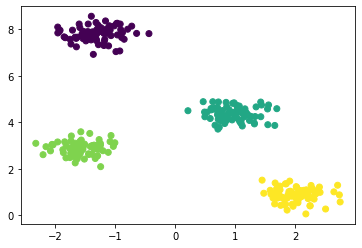

In [5]:
agg_clust.fit(X)

exp = agg_clust.predict(X)
print(np.unique(exp, return_counts=True))

exp1 = agg_clust.predict(X1)
print(np.unique(exp1, return_counts=True))

plt.scatter(X[:,0], X[:,1], c=exp)
plt.show()